## American Sign Language (ASL) Recognition using CNN

### 1. Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import skimage
from skimage.transform import resize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.callbacks import EarlyStopping

### 2. Importing the Dataset

In [2]:
path1 = r'asl_alphabet_train/'
for d, _, files in os.walk(path1):
    print(d)

asl_alphabet_train/
asl_alphabet_train/A
asl_alphabet_train/B
asl_alphabet_train/C
asl_alphabet_train/D
asl_alphabet_train/del
asl_alphabet_train/E
asl_alphabet_train/F
asl_alphabet_train/G
asl_alphabet_train/H
asl_alphabet_train/I
asl_alphabet_train/J
asl_alphabet_train/K
asl_alphabet_train/L
asl_alphabet_train/M
asl_alphabet_train/N
asl_alphabet_train/nothing
asl_alphabet_train/O
asl_alphabet_train/P
asl_alphabet_train/Q
asl_alphabet_train/R
asl_alphabet_train/S
asl_alphabet_train/space
asl_alphabet_train/T
asl_alphabet_train/U
asl_alphabet_train/V
asl_alphabet_train/W
asl_alphabet_train/X
asl_alphabet_train/Y
asl_alphabet_train/Z


In [3]:
c = os.listdir(path1)
print("Number of categories in the training set = ", len(c))

Number of categories in the training set =  29


#### 2.1. Image Labels

In [4]:
def load_labels(c):
    img_list, l = [], []
    for i, j in enumerate(c):
        n = 0
        for k in os.listdir(path1 + "/" + j):
            if n == 100:
                break
            img = cv2.imread(path1 + "/" + j + "/" + k)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_arr = Image.fromarray(img, 'RGB')
            resized_img = img_arr.resize((200, 200))
            img_list.append(np.array(resized_img))
            l.append(i)
            n += 1
    return img_list, l

In [5]:
images, labels = load_labels(c)
print("Number of images in the training set = ", len(images))
print("Number of labels in the training set = ", len(labels))
print(type(images), type(labels))

Number of images in the training set =  2900
Number of labels in the training set =  2900
<class 'list'> <class 'list'>


#### 2.2. Conversion of Images and Labels into NumPy Arrays

In [6]:
images, labels = np.array(images), np.array(labels)
print("Shape of images = ", images.shape)
print("Shape of labels = ", labels.shape)
print(type(images), type(labels))

Shape of images =  (2900, 200, 200, 3)
Shape of labels =  (2900,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


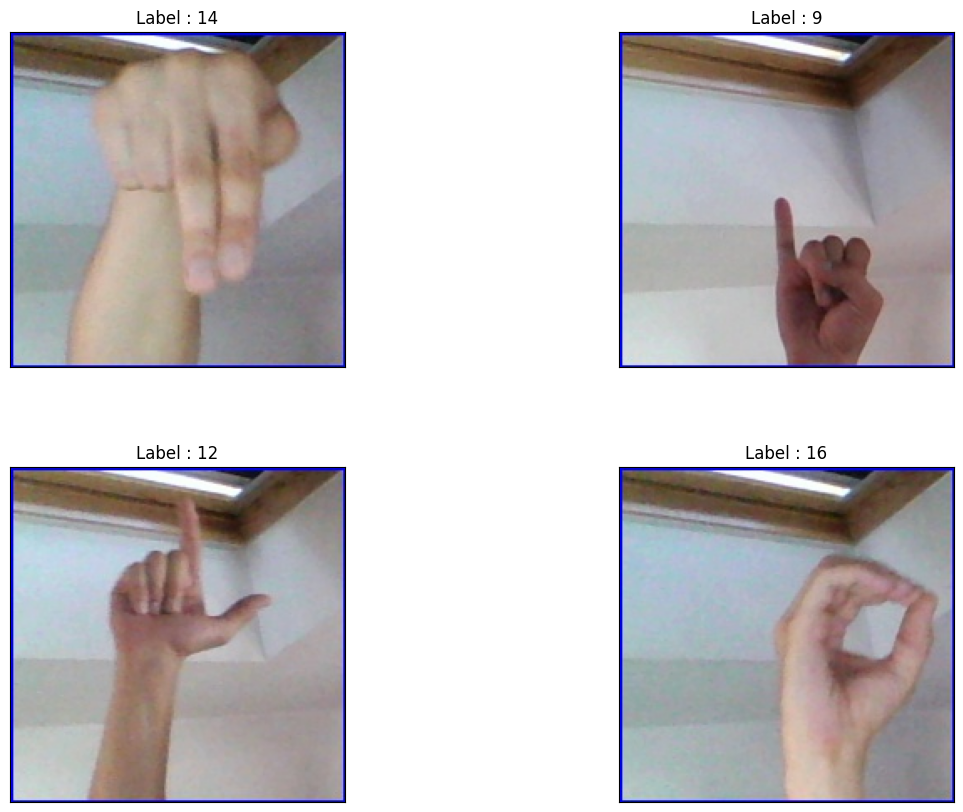

In [7]:
def display_images_and_labels(images, labels):
    plt.figure(1, figsize=(15, 10))
    n = 0
    for i in range(4):
        n += 1
        r = np.random.randint(0, images.shape[0], 1)
        plt.subplot(2, 2, n)
        plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
        plt.imshow(images[r[0]])
        plt.title('Label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
display_images_and_labels(images, labels)

### 3. Image Augmentation

In [8]:
batch_size = 64
image_size = 64
target_dims = (image_size, image_size, 3)
num_classes = 29
train_len = 87000

In [9]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']

In [10]:
def data_gen(folder):
    X = np.empty((train_len, image_size, image_size, 3), dtype = np.float32)
    y = np.empty((train_len, ), dtype = int)
    i = 0
    for f in os.listdir(folder):
        if not f.startswith('.'):
            for image_filename in os.listdir(folder + f):
                img_file = cv2.imread(folder + f + '/' + image_filename)
                if img_file is not None:
                    img_file = resize(img_file, target_dims)
                    img_arr = np.asarray(img_file).reshape((-1, image_size, image_size, 3))
                    X[i] = img_arr
                    y[i] = classes.index(f)
                    i += 1
    return X, y
X, y = data_gen(path1)

In [11]:
print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)
print("Image shape = ", X[0].shape)

Shape of X =  (87000, 64, 64, 3)
Shape of y =  (87000,)
Image shape =  (64, 64, 3)


#### 3.1. Visualization of X and y

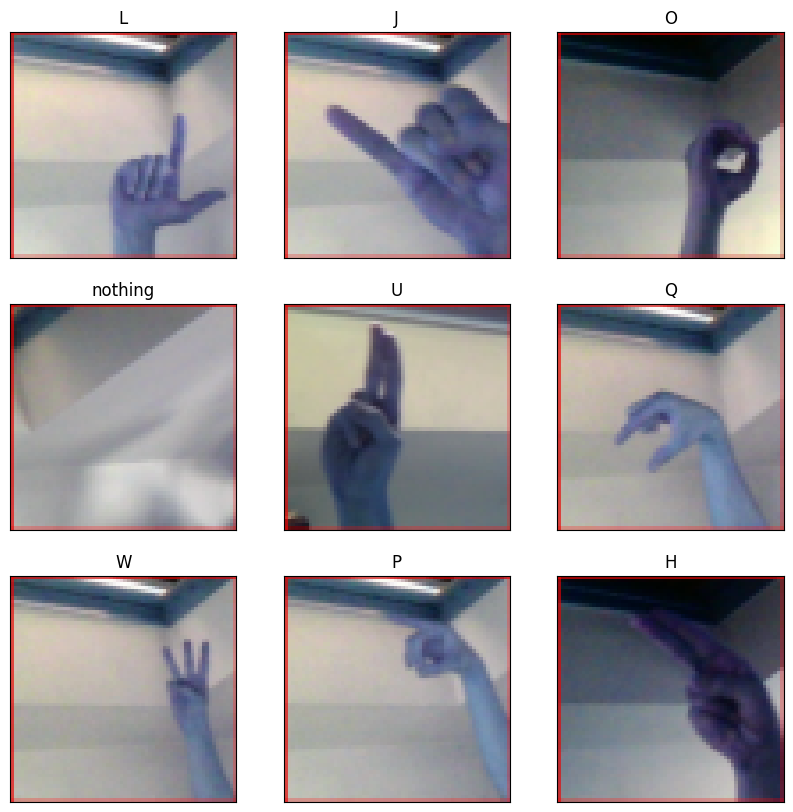

In [12]:
f, axes = plt.subplots(3, 3, figsize = (10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    img_nbr = np.random.randint(0, len(X))
    plt.imshow(X[img_nbr])
    plt.title(classes[y[img_nbr]])

### 4. Data Preprocessing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

#### 4.1. One Hot Encoding

In [14]:
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

#### 4.2. Dimension Verification

In [15]:
print("Shape of Train Set = ", X_train.shape)
print("Shape of Train Labels Without Encoding = ", y_train.shape)
print("Shape of Train Labels After Encoding = ", y_train_encoded.shape)
print()
print("Shape of Test Set = ", X_test.shape)
print("Shape of Test Labels Without Encoding = ", y_test.shape)
print("Shape of Test Labels After Encoding = ", y_test_encoded.shape)

Shape of Train Set =  (60900, 64, 64, 3)
Shape of Train Labels Without Encoding =  (60900,)
Shape of Train Labels After Encoding =  (60900, 29)

Shape of Test Set =  (26100, 64, 64, 3)
Shape of Test Labels Without Encoding =  (26100,)
Shape of Test Labels After Encoding =  (26100, 29)


### 5. The CNN Model

#### 5.1. Building the Model

In [16]:
model = Sequential([

    Conv2D(32, (5, 5), input_shape = target_dims),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Dropout(0.3),

    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(29, activation = 'softmax')

])

model.summary()

d:\Python 3.12\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,637 (1.36 MB)

 Trainable params: 356,637 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

#### 5.2. Early Stopping

In [17]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

#### 5.3. Model Compilation

In [18]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

#### 5.4. Model Fitting

In [19]:
history = model.fit(
    X_train, y_train_encoded,
    batch_size = batch_size,
    epochs = 50,
    validation_data = (X_test, y_test_encoded),
    callbacks = [early_stop]
)

Epoch 1/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 121s 126ms/step - accuracy: 0.9848 - loss: 0.0486 - val_accuracy: 0.9885 - val_loss: 0.0330
Epoch 2/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 113s 119ms/step - accuracy: 0.9864 - loss: 0.0408 - val_accuracy: 0.9934 - val_loss: 0.0208
Epoch 3/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 116s 122ms/step - accuracy: 0.9867 - loss: 0.0402 - val_accuracy: 0.9849 - val_loss: 0.0447
Epoch 4/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 114s 119ms/step - accuracy: 0.9874 - loss: 0.0383 - val_accuracy: 0.9925 - val_loss: 0.0237


#### 5.5. Plotting Accuracy

In [20]:
history_df = pd.DataFrame(history.history)

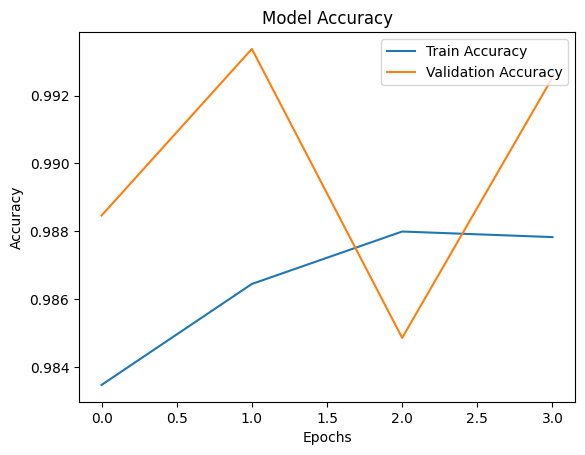

In [21]:
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc = 'upper right')
plt.show()

#### 5.6. Plotting Loss

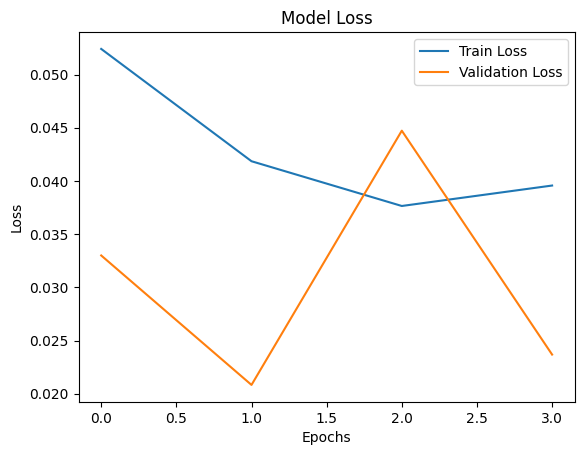

In [22]:
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'], loc = 'upper right')
plt.show()

#### 5.7. Results:
Train Accuracy = $98.74\%$\
Validation Accuracy = $99.25\%$

#### 5.8. Saving the Model

In [23]:
model.save('asl_model.keras')

### 6. Predictions

In [24]:
pred = np.argmax(model.predict(X_test), axis = -1)
pred

816/816 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step


array([14, 21, 17, ..., 12, 26, 27])

#### 6.1. Actual Label vs Predicted Label

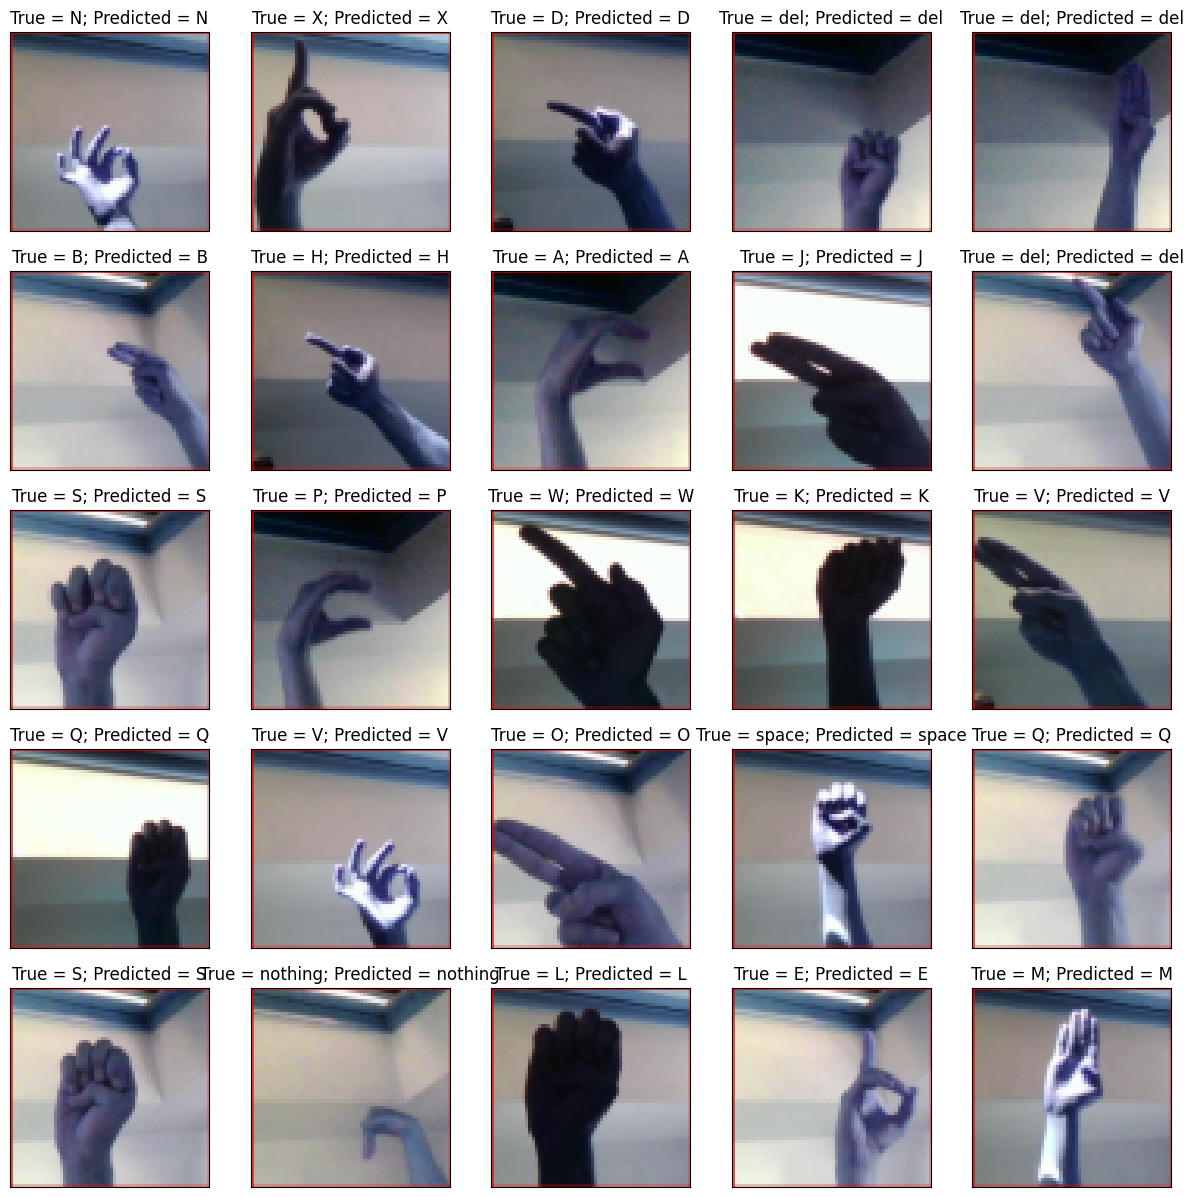

In [25]:
f, axes = plt.subplots(5, 5, figsize = (15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    img_nbr = np.random.randint(0, len(pred))
    plt.imshow(X[img_nbr])
    plt.title('True = {}; Predicted = {}'.format(classes[y_test[img_nbr]], classes[pred[img_nbr]]))

#### 6.2. Confusion Matrix

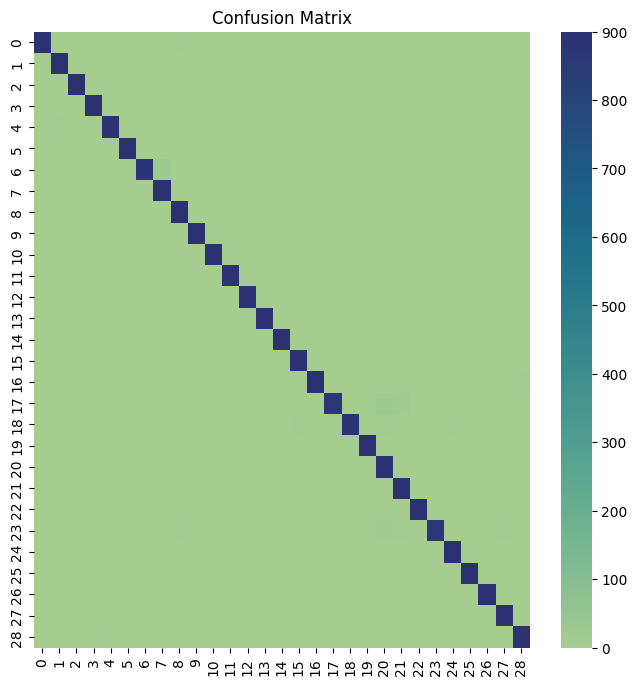

In [26]:
plt.figure(figsize = (8, 8))
sns.heatmap(confusion_matrix(y_test, pred), cmap = 'crest')
plt.title('Confusion Matrix')
plt.show()

#### 6.3. Classification Report

In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       900
           1       0.99      1.00      1.00       900
           2       1.00      1.00      1.00       900
           3       1.00      1.00      1.00       900
           4       0.99      0.98      0.99       900
           5       1.00      1.00      1.00       900
           6       0.99      0.98      0.98       900
           7       0.98      1.00      0.99       900
           8       0.98      1.00      0.99       900
           9       1.00      1.00      1.00       900
          10       1.00      1.00      1.00       900
          11       1.00      0.99      1.00       900
          12       1.00      0.99      0.99       900
          13       1.00      1.00      1.00       900
          14       1.00      1.00      1.00       900
          15       0.99      1.00      1.00       900
          16       1.00      0.99      1.00       900
          17       0.99    